### SQL import 전, 원본 데이터 정리 및 병합
### Data merging before SQL import

In [1]:
import pandas as pd

fTrain = pd.read_csv('data/FraudTrain.csv')
fTest = pd.read_csv('data/FraudTest.csv')


fTrain.info()   #  Train 정보 탐색

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [2]:
fTest.info()   # Test 정보 탐색 -> Unnamed: 0  이라는 추가 컬럼 발견

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
fTest.head(5)  # Unnamed: 0  칼럼 생김새 파악 -> index 역할

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
fTD = fTest.drop(columns='Unnamed: 0')  # 불필요 index 컬럼 삭제 후 확인
fTD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [7]:
fDetection = pd.concat([fTrain, fTD], axis=0, join='inner') # 데이터 합치기
fDetection.info() # 데이터 수 조회 (1604294 도출 여부 확인)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604294 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1604294 non-null  object 
 1   cc_num                 1604294 non-null  float64
 2   merchant               1604294 non-null  object 
 3   category               1604294 non-null  object 
 4   amt                    1604294 non-null  float64
 5   first                  1604294 non-null  object 
 6   last                   1604294 non-null  object 
 7   gender                 1604294 non-null  object 
 8   street                 1604294 non-null  object 
 9   city                   1604294 non-null  object 
 10  state                  1604294 non-null  object 
 11  zip                    1604294 non-null  int64  
 12  lat                    1604294 non-null  float64
 13  long                   1604294 non-null  float64
 14  city_pop           

In [8]:
fDetection.to_csv('data/Fraud_Detection.csv', index=False)  # 병합 데이터 저장 (index 생성 방지)

In [9]:
fD = pd.read_csv('data/Fraud_Detection.csv', index_col = 0)  
fD.info()   # 병합 데이터 로드 및 조회

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 1/1/2019 0:00 to 2020-12-31 23:59:34
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1604294 non-null  float64
 1   merchant    1604294 non-null  object 
 2   category    1604294 non-null  object 
 3   amt         1604294 non-null  float64
 4   first       1604294 non-null  object 
 5   last        1604294 non-null  object 
 6   gender      1604294 non-null  object 
 7   street      1604294 non-null  object 
 8   city        1604294 non-null  object 
 9   state       1604294 non-null  object 
 10  zip         1604294 non-null  int64  
 11  lat         1604294 non-null  float64
 12  long        1604294 non-null  float64
 13  city_pop    1604294 non-null  int64  
 14  job         1604294 non-null  object 
 15  dob         1604294 non-null  object 
 16  trans_num   1604294 non-null  object 
 17  unix_time   1604294 non-null  int64  
 18  mer

In [10]:
fD.isnull().sum()  # 결측치 여부 확인

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [11]:
fD.head(5)  # 생김새 파악

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
fD.iloc[[1048680]]   # date type이 다른 컬럼 조회 (sql 작업 참고용)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2020-06-21 12:46:50,4.119763e+15,fraud_Breitenberg-Hermiston,kids_pets,29.39,Melinda,Gutierrez,F,1497 West Gateway,Eureka,IL,...,40.7152,-89.2706,6713,Archivist,1945-08-19,4924a7f67664a95acbeaeb377d5e6a83,1371818810,41.415532,-89.517881,0


# 여기서부터는 SQL 작업 후 시행하는 코드입니다. (code after sql query)
## SQL작업 데이터 호출 및 저장
## Data load from SQL works and export file from pandas

In [12]:
# 패키지 설치
!pip install cx_Oracle

In [13]:
import cx_Oracle as oci  # python 3.4기준으로 data import하는 방법

#C:\oraclexe\app\oracle\product\11.2.0\server\network\ADMIN 에 가서 tnsname.ora에 port값(1521), service name(xe) 조회
# user와 pw변수는 각자 맞는 정보로 고쳐서 실행
user = "DB"
pw = "1234 "
dsn = "localhost:1521/xe" 


# 연결
con = oci.connect(user=user, password=pw, dsn=dsn)

# 커서
cur = con.cursor()


query = 'select * from FD'
df = pd.read_sql_query(query, con)
df

C:\Users\Seward_Shin\AppData\Local\Temp\ipykernel_1664\1572006386.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


,TRANS_NUM,CC_NUM,CATEGORY,AMT,GENDER,CITY,STATE,CITY_POP,JOB,IS_FRAUD,AGE,TRANS_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,TRANS_DAY_SIMPLIFIED,IS_COVID_YEAR
0,0b242abb623afc578575680df30655b9,2703190000000000.0,misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,35,2019,1,1,0,0,0,0
1,1f76529f8574734946361c461b024d99,630423000000.0,grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,45,2019,1,1,0,0,0,0
2,a1a22d70485983eac12b5b88dad1cf95,38859500000000.0,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,61,2019,1,1,0,0,0,0
3,6b849c168bdad6f867558c3793159a81,3534090000000000.0,gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,56,2019,1,1,0,0,0,0
4,a41d7549acf90789359a9aa5346dcb46,375534000000000.0,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,37,2019,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604289,9b1f753c79894c9f4b71f04581835ada,30560609640617.0,health_fitness,43.77,M,Luray,MO,519,Town planner,0,57,2020,12,31,23,3,2,1
1604290,2090647dac2c89a1d86c514c427f5b91,3556613125071656.0,kids_pets,111.84,M,Lake Jackson,TX,28739,Futures trader,0,23,2020,12,31,23,3,2,1
1604291,6c5b7c8add471975aa0fec023b2e8408,6011724471098086.0,kids_pets,86.88,F,Burbank,WA,3684,Musician,0,41,2020,12,31,23,3,2,1
1604292,14392d723bb7737606b2700ac791b7aa,4079773899158.0,travel,7.99,M,Mesa,ID,129,Cartographer,0,57,2020,12,31,23,3,2,1


In [14]:
df.info()   # 기본 정보 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_NUM              1604294 non-null  object 
 1   CC_NUM                 1604294 non-null  object 
 2   CATEGORY               1604294 non-null  object 
 3   AMT                    1604294 non-null  float64
 4   GENDER                 1604294 non-null  object 
 5   CITY                   1604294 non-null  object 
 6   STATE                  1604294 non-null  object 
 7   CITY_POP               1604294 non-null  int64  
 8   JOB                    1604294 non-null  object 
 9   IS_FRAUD               1604294 non-null  int64  
 10  AGE                    1604294 non-null  int64  
 11  TRANS_YEAR             1604294 non-null  int64  
 12  TRANS_MONTH            1604294 non-null  int64  
 13  TRANS_DAY              1604294 non-null  int64  
 14  TRANS_HOUR        

In [15]:
df = df.drop(columns='TRANS_NUM')  # remove index
# 컬럼 순서 병경
df = df[['TRANS_YEAR','IS_COVID_YEAR', 'TRANS_MONTH','TRANS_DAY','TRANS_DAY_SIMPLIFIED','TRANS_HOUR','TRANS_HOUR_SIMPLIFIED','CATEGORY','AMT','GENDER','CITY','CITY_POP','STATE','JOB','AGE','IS_FRAUD', 'CC_NUM']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_YEAR             1604294 non-null  int64  
 1   IS_COVID_YEAR          1604294 non-null  int64  
 2   TRANS_MONTH            1604294 non-null  int64  
 3   TRANS_DAY              1604294 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   1604294 non-null  int64  
 5   TRANS_HOUR             1604294 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  1604294 non-null  int64  
 7   CATEGORY               1604294 non-null  object 
 8   AMT                    1604294 non-null  float64
 9   GENDER                 1604294 non-null  object 
 10  CITY                   1604294 non-null  object 
 11  CITY_POP               1604294 non-null  int64  
 12  STATE                  1604294 non-null  object 
 13  JOB                    1604294 non-null  object 
 14  AGE               

In [16]:
# category type = data has reptitive string pattern
df['IS_COVID_YEAR'] = df['IS_COVID_YEAR'].astype('bool')
df['IS_FRAUD'] = df['IS_FRAUD'].astype('bool')


df.info() # check data Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_YEAR             1604294 non-null  int64  
 1   IS_COVID_YEAR          1604294 non-null  bool   
 2   TRANS_MONTH            1604294 non-null  int64  
 3   TRANS_DAY              1604294 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   1604294 non-null  int64  
 5   TRANS_HOUR             1604294 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  1604294 non-null  int64  
 7   CATEGORY               1604294 non-null  object 
 8   AMT                    1604294 non-null  float64
 9   GENDER                 1604294 non-null  object 
 10  CITY                   1604294 non-null  object 
 11  CITY_POP               1604294 non-null  int64  
 12  STATE                  1604294 non-null  object 
 13  JOB                    1604294 non-null  object 
 14  AGE               

In [17]:
# statistics for numeric data
df.describe()

,TRANS_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,AMT,CITY_POP,AGE
count,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06
mean,2.019424e+03,7.551812e+00,1.585361e+01,1.025187e+00,1.280364e+01,1.583147e+00,6.997209e+01,8.876822e+04,4.949227e+01
std,4.941157e-01,3.489999e+00,8.931615e+00,8.291216e-01,6.814804e+00,1.100024e+00,1.588492e+02,3.017287e+05,1.740585e+01
min,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.300000e+01,1.800000e+01
25%,2.019000e+03,5.000000e+00,8.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,9.640000e+00,7.430000e+02,3.600000e+01
50%,2.019000e+03,8.000000e+00,1.600000e+01,1.000000e+00,1.400000e+01,2.000000e+00,4.739000e+01,2.443000e+03,4.700000e+01
75%,2.020000e+03,1.100000e+01,2.400000e+01,2.000000e+00,1.900000e+01,3.000000e+00,8.304000e+01,2.032800e+04,6.100000e+01
max,2.020000e+03,1.200000e+01,3.100000e+01,2.000000e+00,2.300000e+01,3.000000e+00,2.894890e+04,2.906700e+06,9.800000e+01


In [18]:
# numeric data correlation
df_corr = df.corr()
df_corr

C:\Users\Seward_Shin\AppData\Local\Temp\ipykernel_1664\4275728016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,AMT,CITY_POP,AGE,IS_FRAUD
TRANS_YEAR,1.000000,1.000000,0.134471,0.001236,-0.000049,-0.000808,-0.000661,-0.002154,-0.001456,-0.004487,-0.009246
IS_COVID_YEAR,1.000000,1.000000,0.134471,0.001236,-0.000049,-0.000808,-0.000661,-0.002154,-0.001456,-0.004487,-0.009246
TRANS_MONTH,0.134471,0.134471,1.000000,0.028544,0.026240,-0.000076,-0.000043,-0.002485,-0.000837,-0.000753,-0.017300
TRANS_DAY,0.001236,0.001236,0.028544,1.000000,0.943843,0.000550,0.000655,-0.000006,0.000261,-0.001376,0.000439
TRANS_DAY_SIMPLIFIED,-0.000049,-0.000049,0.026240,0.943843,1.000000,0.001492,0.001611,0.000058,0.000263,-0.001269,0.000864
TRANS_HOUR,-0.000808,-0.000808,-0.000076,0.000550,0.001492,1.000000,0.966335,-0.025482,0.019556,-0.172878,0.012137
TRANS_HOUR_SIMPLIFIED,-0.000661,-0.000661,-0.000043,0.000655,0.001611,0.966335,1.000000,-0.025788,0.019421,-0.171103,0.012559
AMT,-0.002154,-0.002154,-0.002485,-0.000006,0.000058,-0.025482,-0.025788,1.000000,0.005220,-0.011101,0.206947
CITY_POP,-0.001456,-0.001456,-0.000837,0.000261,0.000263,0.019556,0.019421,0.005220,1.000000,-0.092906,-0.000192
AGE,-0.004487,-0.004487,-0.000753,-0.001376,-0.001269,-0.172878,-0.171103,-0.011101,-0.092906,1.000000,0.009867


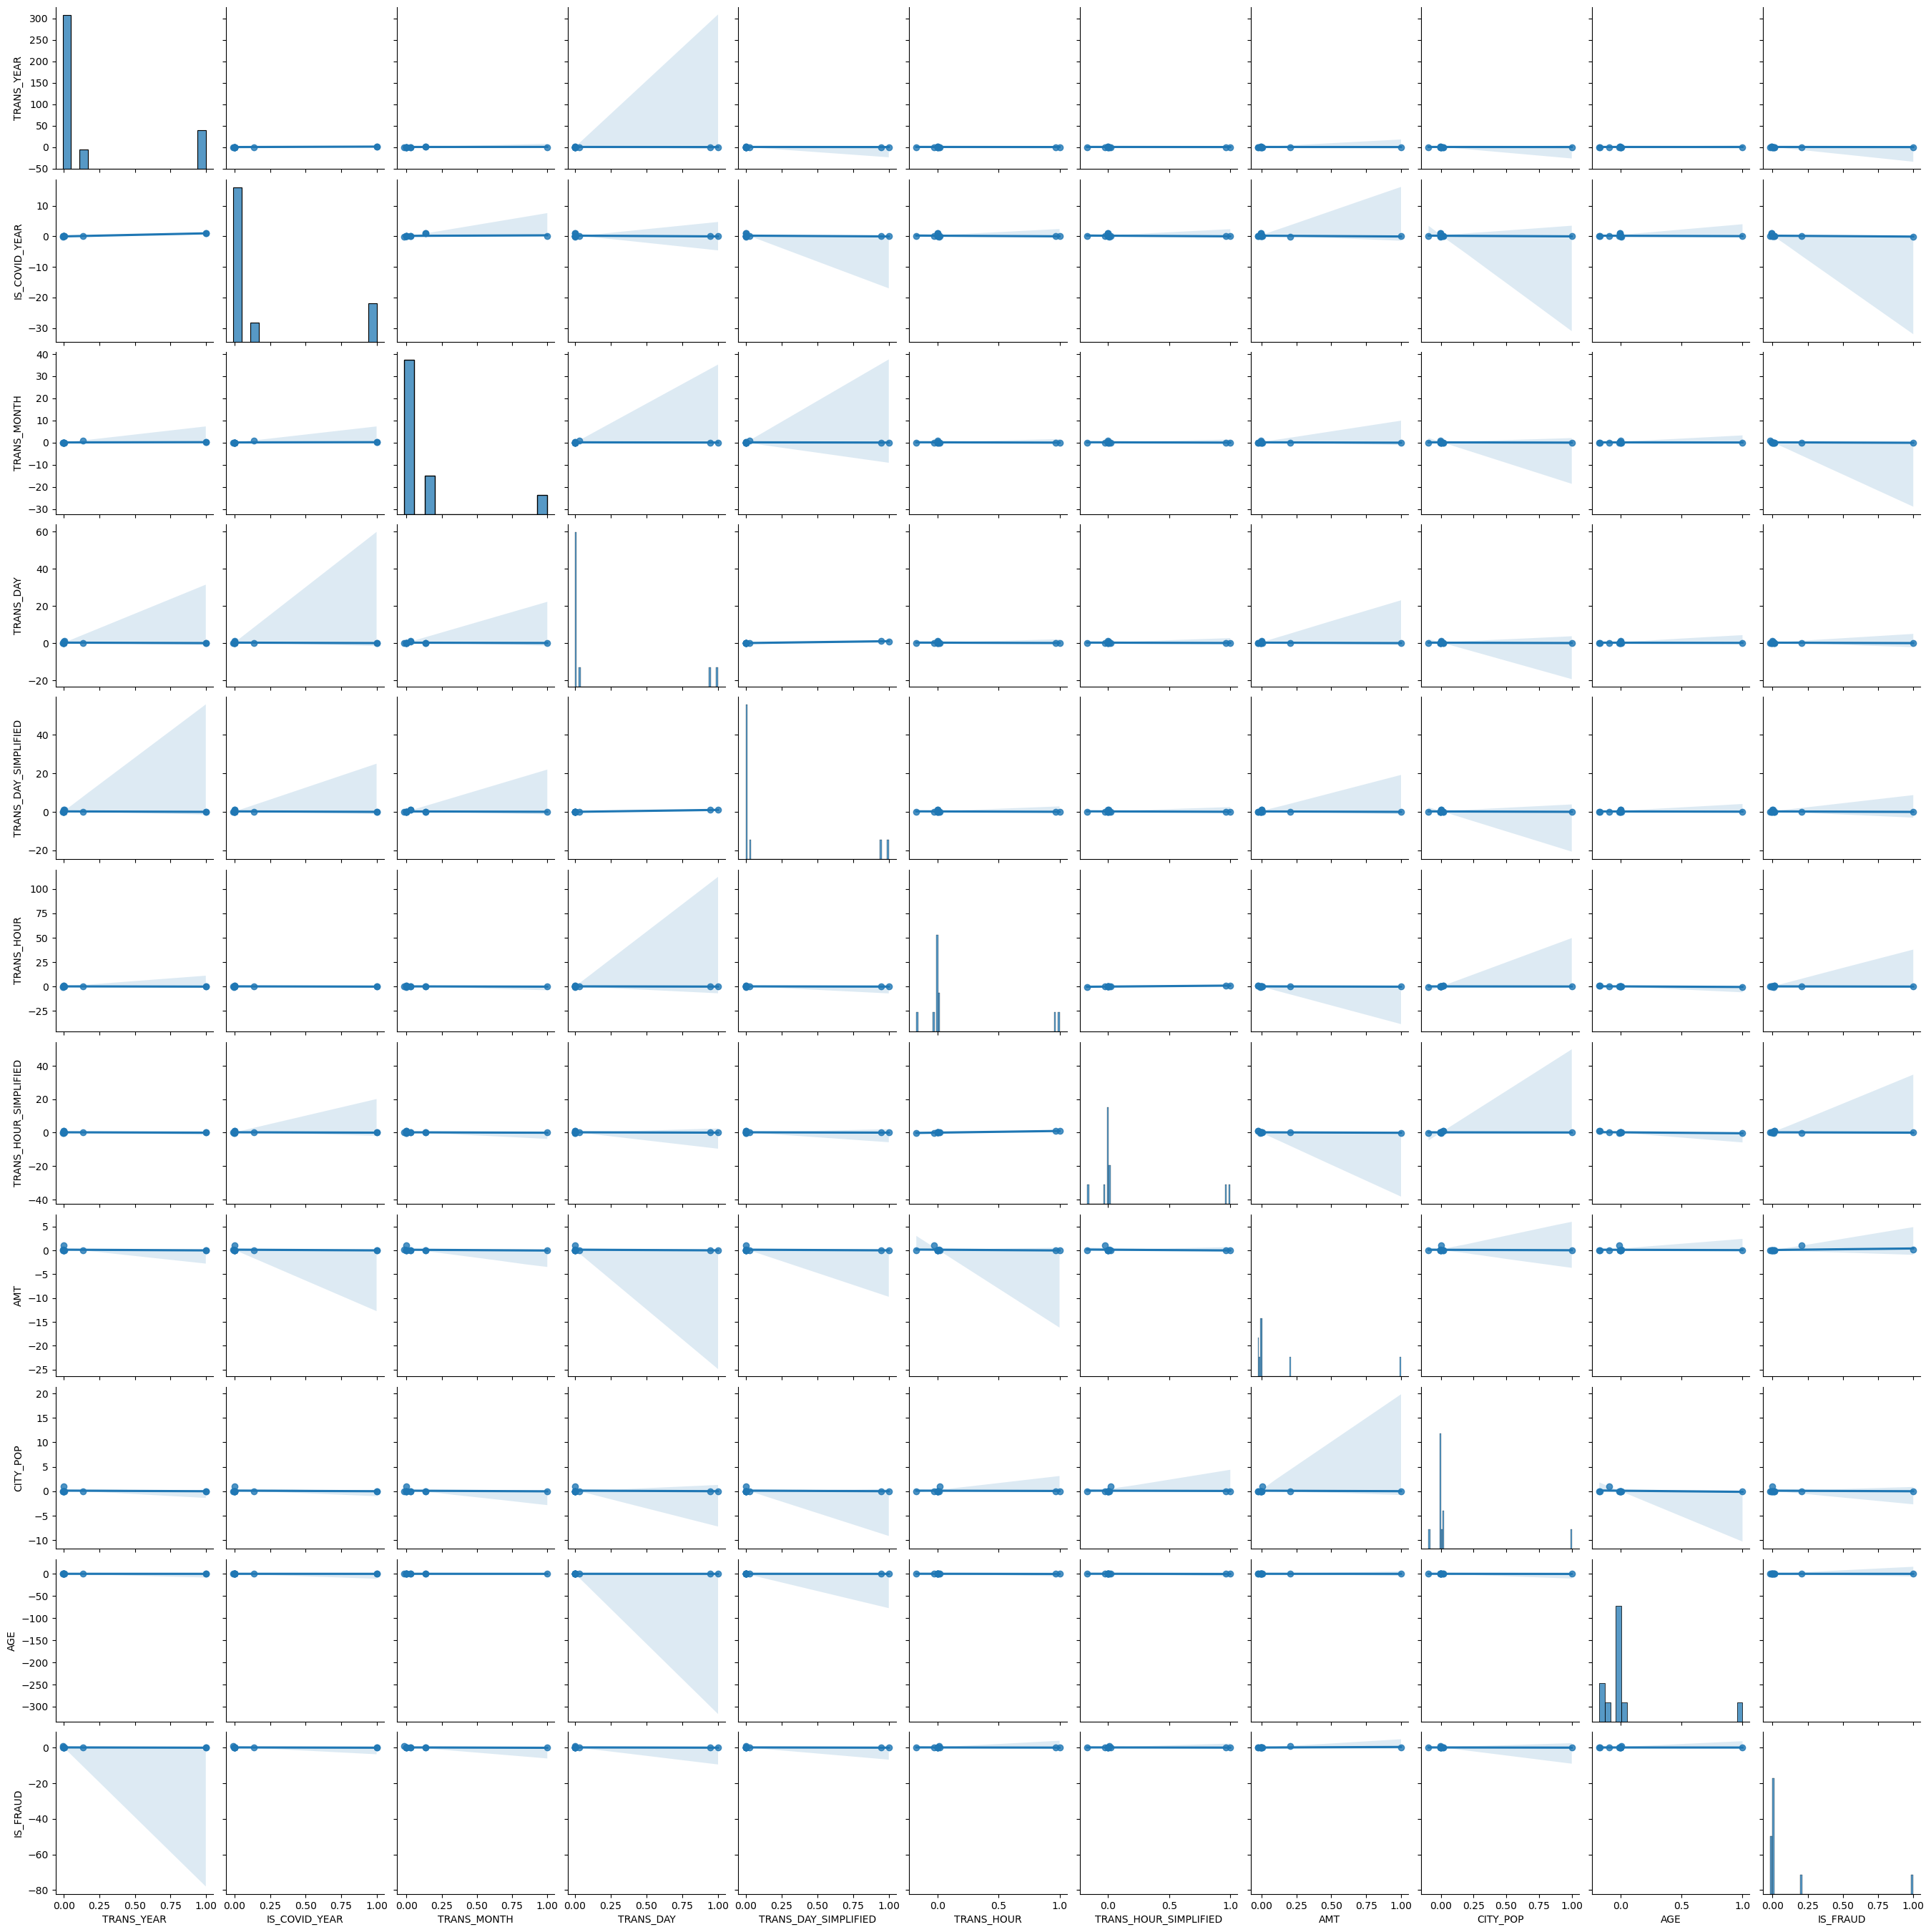

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# numeric data pairplot
sns.pairplot(df_corr, kind='reg')  # kind = 'reg'로 회귀선 추가
plt.show()

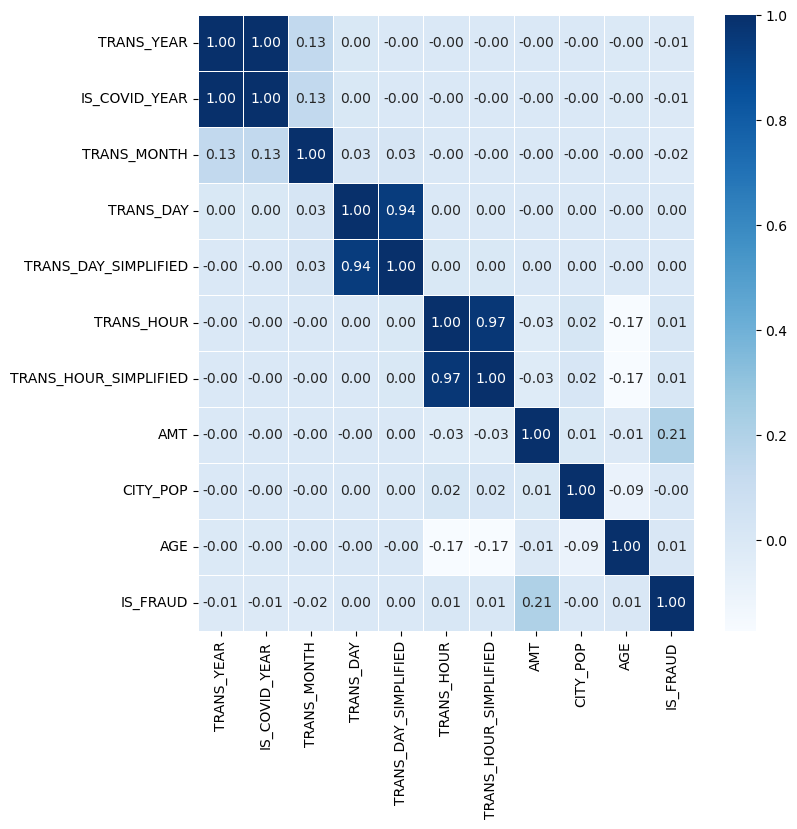

In [20]:
# numeric data heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [21]:
# SQL 작업 + type변환 데이터 저장 (index 생성 방지 옵션 설정)
df.to_csv('data/Fraud_Detection_sql.csv', index=False) 

In [22]:
fDs = pd.read_csv('data/Fraud_Detection_sql.csv') 
fDs.info()   # 병합 데이터 로드 및 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_YEAR             1604294 non-null  int64  
 1   IS_COVID_YEAR          1604294 non-null  bool   
 2   TRANS_MONTH            1604294 non-null  int64  
 3   TRANS_DAY              1604294 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   1604294 non-null  int64  
 5   TRANS_HOUR             1604294 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  1604294 non-null  int64  
 7   CATEGORY               1604294 non-null  object 
 8   AMT                    1604294 non-null  float64
 9   GENDER                 1604294 non-null  object 
 10  CITY                   1604294 non-null  object 
 11  CITY_POP               1604294 non-null  int64  
 12  STATE                  1604294 non-null  object 
 13  JOB                    1604294 non-null  object 
 14  AGE               

In [23]:
fDs.isnull().sum()  # 결측치 여부 확인

TRANS_YEAR               0
IS_COVID_YEAR            0
TRANS_MONTH              0
TRANS_DAY                0
TRANS_DAY_SIMPLIFIED     0
TRANS_HOUR               0
TRANS_HOUR_SIMPLIFIED    0
CATEGORY                 0
AMT                      0
GENDER                   0
CITY                     0
CITY_POP                 0
STATE                    0
JOB                      0
AGE                      0
IS_FRAUD                 0
CC_NUM                   0
dtype: int64

### 문제발견! (problem!)
to_csv는 변형된 dtype 전부 저장 불가 -> 필요에 따라 변환  
to_csv cannot save all changed dtypes -> need to apply when load python if necessary

In [24]:
df.describe(include='all', datetime_is_numeric=True)  # 문자열 정보를 포함한 경우

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,IS_FRAUD,CC_NUM
count,1.604294e+06,1604294,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1604294,1.604294e+06,1604294,1604294,1.604294e+06,1604294,1604294,1.604294e+06,1604294,1604294
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,14,NaN,2,891,NaN,51,496,NaN,2,1860
top,NaN,False,NaN,NaN,NaN,NaN,NaN,gas_transport,NaN,F,Birmingham,NaN,TX,Film/video editor,NaN,False,6011370000000000.0
freq,NaN,924850,NaN,NaN,NaN,NaN,NaN,162800,NaN,878854,6922,NaN,117124,12059,NaN,1596143,4173
mean,2.019424e+03,NaN,7.551812e+00,1.585361e+01,1.025187e+00,1.280364e+01,1.583147e+00,NaN,6.997209e+01,NaN,NaN,8.876822e+04,NaN,NaN,4.949227e+01,NaN,NaN
std,4.941157e-01,NaN,3.489999e+00,8.931615e+00,8.291216e-01,6.814804e+00,1.100024e+00,NaN,1.588492e+02,NaN,NaN,3.017287e+05,NaN,NaN,1.740585e+01,NaN,NaN
min,2.019000e+03,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,NaN,NaN,2.300000e+01,NaN,NaN,1.800000e+01,NaN,NaN
25%,2.019000e+03,NaN,5.000000e+00,8.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,NaN,9.640000e+00,NaN,NaN,7.430000e+02,NaN,NaN,3.600000e+01,NaN,NaN
50%,2.019000e+03,NaN,8.000000e+00,1.600000e+01,1.000000e+00,1.400000e+01,2.000000e+00,NaN,4.739000e+01,NaN,NaN,2.443000e+03,NaN,NaN,4.700000e+01,NaN,NaN
75%,2.020000e+03,NaN,1.100000e+01,2.400000e+01,2.000000e+00,1.900000e+01,3.000000e+00,NaN,8.304000e+01,NaN,NaN,2.032800e+04,NaN,NaN,6.100000e+01,NaN,NaN
